In [ ]:
#https://keras.io/examples/vision/pointnet/
#https://medium.com/@mrgarg.rajat/training-on-large-datasets-that-dont-fit-in-memory-in-keras-60a974785d71

In [1]:
from google.colab import drive
import os
import numpy as np
import nibabel as nib
import pandas as pd
import random
import pickle # for saving procesed files
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

df = pd.read_csv("/content/drive/MyDrive/NUS_GAIP_GRP9/dataset/BRATS/MICCAI_BraTS2020_TrainingData/name_mapping.csv",delimiter=',')

In [5]:
temp=df.drop(['BraTS_2017_subject_ID', 'BraTS_2018_subject_ID', 'TCGA_TCIA_subject_ID'], axis=1)
temp['BraTS_2019_subject_ID']=temp['BraTS_2019_subject_ID'].fillna(0)
temp.groupby('Grade').count()

,BraTS_2019_subject_ID,BraTS_2020_subject_ID
Grade,,
HGG,293,293
LGG,76,76


In [6]:
root_dir='/content/drive/MyDrive/NUS_GAIP_GRP9/dataset/BRATS/MICCAI_BraTS_2019_Data_Training'
df = pd.read_csv("/content/drive/MyDrive/NUS_GAIP_GRP9/dataset/BRATS/MICCAI_BraTS_2019_Data_Training/name_mapping.csv",delimiter=',')
df=df.drop(['BraTS_2017_subject_ID','BraTS_2018_subject_ID','TCGA_TCIA_subject_ID'], axis=1)
df=df.dropna()
df['file_loc']=root_dir+'/'+df['Grade']+'/'+df['BraTS_2019_subject_ID']+'/'+df['BraTS_2019_subject_ID']+'_flair.nii'
df=df.replace('HGG', 1)
df=df.replace('LGG', 0)
df.to_csv('Dataframe.csv')

In [7]:
hgg_df=df[df['Grade']==1]
lgg_df=df[df['Grade']==0]
sam_hgg_df=hgg_df.sample(76,random_state=10)
sam_lgg_df=lgg_df.sample(76,random_state=10)
df=pd.concat([sam_hgg_df, sam_lgg_df])
df=df.sample(frac=1)
df.to_csv('df.csv')

In [8]:
df=pd.read_csv('Dataframe.csv')
df.groupby(['Grade']).count()

,Unnamed: 0,BraTS_2019_subject_ID,file_loc
Grade,,,
0,76,76,76
1,259,259,259


In [9]:
df=pd.read_csv('df.csv')
df.groupby(['Grade']).count()

,Unnamed: 0,BraTS_2019_subject_ID,file_loc
Grade,,,
0,76,76,76
1,76,76,76


In [ ]:

def parse_dataset():
    
    processed_loc='/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/'
    root_dir='/content/drive/MyDrive/NUS_GAIP_GRP9/dataset/BRATS/MICCAI_BraTS_2019_Data_Training'
    df=pd.read_csv('Dataframe.csv')

    for i in range(len(df)):
          print('Processing files:{}/{}'.format(i+1, len(df)))
          loc=df.iloc[i][3]
          seg_loc=loc.replace('flair', 'seg')
          xyz=nib.load(loc)
          seg_file=nib.load(seg_loc)
          seg_data=seg_file.get_fdata()
          data=xyz.get_fdata()
          data=np.array(data)
          points=[]
          datmin=2000
          datmax=0
          for x in range(240):
            for y in range(240):
              for z in range(155):
                if data[x][y][z]!=0 and seg_data[x][y][z]!=0:
                  points.append([x,y,z,data[x][y][z]])
                  if data[x][y][z]<datmin:
                    datmin=data[x][y][z]
                  if data[x][y][z]>datmax:
                    datmax=data[x][y][z]
          for t in points:
            t[0]=t[0]/240
            t[1]=t[1]/240
            t[2]=t[2]/155
            t[3]=(t[3]-datmin)/(datmax-datmin)                       
          if len(points)<100000:
            for j in range(len(points), 100000):
              points.append([0,0,0,0])
          file_loc=processed_loc+df.iloc[i][2]
          with open(file_loc, 'wb') as fp:
            pickle.dump(points, fp)

In [ ]:
#parse_dataset()

In [ ]:
"""
np.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/trainfilenames.npy', train_points)
np.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/testfilenames.npy', test_points)
np.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/train_labels.npy', train_labels)
np.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/test_labels.npy', test_labels)
np.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/valfilenames.npy', val_points)
np.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/val_labels.npy', val_labels)
"""

"\nnp.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/trainfilenames.npy', train_points)\nnp.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/testfilenames.npy', test_points)\nnp.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/train_labels.npy', train_labels)\nnp.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/test_labels.npy', test_labels)\nnp.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/valfilenames.npy', val_points)\nnp.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/val_labels.npy', val_labels)\n"

In [ ]:
'''df=pd.read_csv('df.csv')
train, val, train_labels, val_labels = train_test_split(df['BraTS_2019_subject_ID'], df['Grade'], test_size=0.3, random_state=45)
np.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/trainfilenames.npy', train)
np.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/train_labels.npy', train_labels)
np.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/valfilenames.npy', val)
np.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/val_labels.npy', val_labels)'''

"df=pd.read_csv('df.csv')\ntrain, val, train_labels, val_labels = train_test_split(df['BraTS_2019_subject_ID'], df['Grade'], test_size=0.3, random_state=45)\nnp.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/trainfilenames.npy', train)\nnp.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/train_labels.npy', train_labels)\nnp.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/valfilenames.npy', val)\nnp.save('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/val_labels.npy', val_labels)"

In [10]:
trainfiles=np.load('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/trainfilenames.npy',allow_pickle=True)
testfiles=np.load('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/testfilenames.npy',allow_pickle=True)
valfiles=np.load('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/valfilenames.npy',allow_pickle=True)
train_labels=np.load('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/train_labels.npy',allow_pickle=True)
test_labels=np.load('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/test_labels.npy',allow_pickle=True)
val_labels=np.load('/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/val_labels.npy',allow_pickle=True)

NUM_POINTS = 100000
NUM_CLASSES = 2


In [11]:
zeroes=0
ones=0
for i in range(len(train_labels)):

  if train_labels[i]==1:
    ones=ones+1
  else:
    zeroes=zeroes+1
print(ones, zeroes)
zeroes=0
ones=0
for i in range(len(val_labels)):

  if train_labels[i]==1:
    ones=ones+1
  else:
    zeroes=zeroes+1
print(ones, zeroes)

52 54
22 24


In [12]:
size_train=len(trainfiles)
size_test=len(testfiles)
size_val=len(valfiles)
print(size_train)
print(size_test)
print(size_val)

106
50
46


In [13]:
outfile='/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/'+trainfiles[1]
with open (outfile, 'rb') as fp:
  item = pickle.load(fp)
item

[[0.5958333333333333,
  0.6083333333333333,
  0.5483870967741935,
  0.1737649063032368],
 [0.5958333333333333, 0.6125, 0.535483870967742, 0.14821124361158433],
 [0.6, 0.6083333333333333, 0.5483870967741935, 0.1635434412265758],
 [0.6, 0.6125, 0.535483870967742, 0.1635434412265758],
 [0.6, 0.6125, 0.5419354838709678, 0.17035775127768313],
 [0.6, 0.6125, 0.5483870967741935, 0.18228279386712096],
 [0.6, 0.6166666666666667, 0.5290322580645161, 0.19591141396933562],
 [0.6, 0.6166666666666667, 0.535483870967742, 0.22487223168654175],
 [0.6, 0.6166666666666667, 0.5483870967741935, 0.21976149914821125],
 [0.6, 0.6208333333333333, 0.5290322580645161, 0.19761499148211242],
 [0.6, 0.6208333333333333, 0.535483870967742, 0.20783645655877342],
 [0.6041666666666666,
  0.6083333333333333,
  0.5290322580645161,
  0.16695059625212946],
 [0.6041666666666666,
  0.6083333333333333,
  0.535483870967742,
  0.16183986371379896],
 [0.6041666666666666,
  0.6083333333333333,
  0.5419354838709678,
  0.14821124361

In [14]:
itemlist=[]
for t in item:
  if np.array_equal(t,[0,0,0,0]):
    break
  temp=t
  t[0]=temp[0]+random.random()*0.0005
  t[1]=temp[1]+random.random()*0.0005
  t[2]=temp[2]+random.random()*0.0005
  t[3]=temp[3]+random.random()*0.0005
itemlist.append(item)

In [15]:
class custom_generator(keras.utils.Sequence) :
  
  def __init__(self, image_filenames, labels, batch_size) :
    self.image_filenames = image_filenames
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    itemlist=[]
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    processed_loc='/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/'
    for name in batch_x:
      outfile=processed_loc+name
      with open (outfile, 'rb') as fp:
        item = pickle.load(fp)        
        if len(item)>100000:
          item=random.sample(item, 100000)
        random.shuffle(item)
        itemlist.append(np.array(item))
    return np.array(itemlist, dtype=float), np.array(batch_y)

In [16]:
def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.9)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.9)(x)
    return layers.Activation("relu")(x)

    
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))

In [17]:
def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)
    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [18]:
def pointnet():

  inputs = keras.Input(shape=(NUM_POINTS, 4))

  x = tnet(inputs, 4)
  x = conv_bn(x, 32)
  x = conv_bn(x, 32)
  x = tnet(x, 32)
  x = conv_bn(x, 32)
  x = conv_bn(x, 64)
  x = conv_bn(x, 512)
  x = layers.GlobalMaxPooling1D()(x)
  x = dense_bn(x, 256)
  x = layers.Dropout(0.3)(x)
  x = dense_bn(x, 128)
  x = layers.Dropout(0.3)(x)

  outputs = layers.Dense(1, activation="sigmoid")(x)

  return keras.Model(inputs=inputs, outputs=outputs, name="pointnet")


In [19]:
def pointnet_1():
  
  inputs = keras.Input(shape=(NUM_POINTS, 4))

  x = tnet(inputs, 4)
  x = conv_bn(x, 32)
  x = conv_bn(x, 64)
  x = conv_bn(x, 512)
  x = layers.GlobalMaxPooling1D()(x)
  x = dense_bn(x, 256)
  x = layers.Dropout(0.3)(x)
  x = dense_bn(x, 128)
  x = layers.Dropout(0.3)(x)

  outputs = layers.Dense(1, activation="sigmoid")(x)

  return keras.Model(inputs=inputs, outputs=outputs, name="pointnet")

In [ ]:
model=pointnet_1()
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100000, 4)]  0                                            
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 100000, 32)   160         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 100000, 32)   128         conv1d_6[0][0]                   
__________________________________________________________________________________________________
activation_10 (Activation)      (None, 100000, 32)   0           batch_normalization_10[0][0]     
___________________________________________________________________________________________

In [ ]:
batch_size=4
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.005),
    metrics=["binary_accuracy"],
)


In [ ]:
# model1 ,optimizer=adam, momentum=0.9 and learning rate 0.001
# model2 has structure of pointnet,optimizer=adam, momentum=0.9 and learning rate 0.005
# model_new1 has structure of pointnet optimizer=adam, momentum=0.9 and learning rate 0.001
# model_new2 has structure of pointnet_1 optimizer=adam, momentum=0.9 and learning rate 0.001
# model_new3 has structure of pointnet optimizer=adam, momentum=0.9 and learning rate 0.005
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
csv_logger=CSVLogger('/content/drive/MyDrive/NUS_GAIP_GRP9/pointnet_models/model_new3.log', append=True)
checkpoint=ModelCheckpoint(filepath='/content/drive/MyDrive/NUS_GAIP_GRP9/pointnet_models/model_new3.h5', monitor='val_binary_accuracy', save_best_only=True, mode='max', save_weights_only=True)

model.fit(x=custom_generator(trainfiles, train_labels, batch_size),
                   steps_per_epoch = size_train // batch_size,
                   epochs = 50,
                   verbose = 1,
                   validation_data = custom_generator(valfiles, val_labels, batch_size),
                   validation_steps = size_val // batch_size,)

Epoch 1/100
26/26 [==============================] - 121s 5s/step - loss: 1.0041 - binary_accuracy: 0.5392 - val_loss: 1.4353 - val_binary_accuracy: 0.5000
Epoch 2/100
26/26 [==============================] - 112s 4s/step - loss: 1.0235 - binary_accuracy: 0.4706 - val_loss: 0.9942 - val_binary_accuracy: 0.5682
Epoch 3/100
26/26 [==============================] - 112s 4s/step - loss: 0.9275 - binary_accuracy: 0.4706 - val_loss: 1.4828 - val_binary_accuracy: 0.3864
Epoch 4/100
26/26 [==============================] - 115s 4s/step - loss: 0.8312 - binary_accuracy: 0.5196 - val_loss: 0.9977 - val_binary_accuracy: 0.5909
Epoch 5/100
26/26 [==============================] - 114s 4s/step - loss: 0.8252 - binary_accuracy: 0.5294 - val_loss: 0.9692 - val_binary_accuracy: 0.6591
Epoch 6/100
26/26 [==============================] - 114s 4s/step - loss: 0.7763 - binary_accuracy: 0.5588 - val_loss: 0.7877 - val_binary_accuracy: 0.6136
Epoch 7/100
26/26 [==============================] - 113s 4s/ste

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f3af91985f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 52/100
 2/26 [=>............................] - ETA: 1:24 - loss: 0.3713 - binary_accuracy: 0.7500

KeyboardInterrupt: ignored

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
plot_accuracies(history)

In [20]:
model=pointnet()
model.load_weights('/content/drive/MyDrive/NUS_GAIP_GRP9/pointnet_models/model_new1.h5')

In [21]:
len(valfiles), len(trainfiles)

(46, 106)

In [22]:
test_labels=val_labels[:20]

In [23]:
testfiles = valfiles[:20]

In [24]:
y_pred = []
for i in range(len(testfiles)):
  outfile='/content/drive/MyDrive/NUS_GAIP_GRP9/processed_dataset_pointcloud/'+testfiles[i]
  with open (outfile, 'rb') as fp:
    item = pickle.load(fp)
  if len(item)>100000:
      item=random.sample(item, 100000)
  random.shuffle(item)
  test=np.array(item, dtype=float)
  test=test.reshape(1, 100000, 4)
  temp = model.predict(test)
  if temp<0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [25]:
y_pred

[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]

In [26]:
y_pred == test_labels

array([False, False,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True])

In [27]:
test_labels

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [28]:
df = pd.read_csv('/content/drive/MyDrive/NUS_GAIP_GRP9/pointnet_models/model_new3.log')

In [ ]:
df

,epoch,binary_accuracy,loss,val_binary_accuracy,val_loss
0,0,0.549020,1.013099,0.500000,88.344246
1,1,0.539216,0.938450,0.545455,0.806913
2,2,0.470588,0.824892,0.477273,1.027340
3,3,0.529412,0.852697,0.500000,4.329136
4,4,0.598039,0.838088,0.659091,0.900368
5,5,0.549020,0.885021,0.522727,0.958097
6,6,0.627451,0.687250,0.500000,1.130175
7,7,0.627451,0.662057,0.568182,0.993747
8,8,0.715686,0.650851,0.590909,0.981987
9,9,0.578431,0.765204,0.431818,1.379673


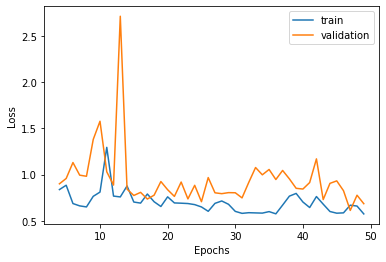

In [34]:
import matplotlib.pyplot as plt
plt.plot(df.epoch[4:50],df.loss[4:50])
plt.plot(df.epoch[4:50],df.val_loss[4:50])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["train", "validation"])

In [32]:
'''plt.plot(df.epoch[10:100],df.loss[10:100])
plt.plot(df.epoch[10:100],df.val_loss[10:100])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["train", "validation"])'''

'plt.plot(df.epoch[10:100],df.loss[10:100])\nplt.plot(df.epoch[10:100],df.val_loss[10:100])\nplt.xlabel(\'Epochs\')\nplt.ylabel(\'Loss\')\nplt.legend(["train", "validation"])'

In [35]:
from sklearn.metrics import classification_report

target_names = ['HGG','LGG']
print(classification_report(test_labels, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         HGG       0.55      0.67      0.60         9
         LGG       0.67      0.55      0.60        11

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20

